In [2]:
# import datatable as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/chocolate_bars.csv')
# Reading in the data
# df = dtf.to_pandas()

# Take a look at the first few datapoints
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

## 💡 Learn more

The following DataCamp courses can help review the skills needed for this challenge:

* [Data Manipulation with pandas](https://www.datacamp.com/courses/data-manipulation-with-pandas)
* [Introduction to Data Visualization with Seaborn](https://www.datacamp.com/courses/introduction-to-data-visualization-with-seaborn)
* [Introduction to Statistics in Python](https://www.datacamp.com/courses/introduction-to-statistics-in-python)

In [4]:
df.dtypes
df.isnull().sum()
## From here, it shows that there are null values in the dataset.
## Let's investigate the null values and deal with them.
df.dropna(inplace=True)
##

In [5]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.00000
mean,1451.520262,2014.485878,71.496725,3.041343,3.21009
std,755.521714,3.957507,5.156974,0.913728,0.42837
min,5.000000,2006.000000,42.000000,1.000000,1.00000
25%,833.000000,2012.000000,70.000000,2.000000,3.00000
50%,1474.000000,2015.000000,70.000000,3.000000,3.25000
75%,2100.000000,2018.000000,74.000000,4.000000,3.50000
max,2712.000000,2021.000000,100.000000,6.000000,4.00000


### I checked for null values in the dataset and removed them
After removing null values, dataset was left with 2443 rows.

In [6]:
df.isnull().sum()

id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
dtype: int64

- Now there isn't null values in the dataset and so we can continue with Exploratory Data Analysis

In [7]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.00000
mean,1451.520262,2014.485878,71.496725,3.041343,3.21009
std,755.521714,3.957507,5.156974,0.913728,0.42837
min,5.000000,2006.000000,42.000000,1.000000,1.00000
25%,833.000000,2012.000000,70.000000,2.000000,3.00000
50%,1474.000000,2015.000000,70.000000,3.000000,3.25000
75%,2100.000000,2018.000000,74.000000,4.000000,3.50000
max,2712.000000,2021.000000,100.000000,6.000000,4.00000


In [8]:
# Top 5 Chocolates with the highest frequncy in the dataset
df[['bar_name']].value_counts(ascending=False).head()

bar_name          
Madagascar            52
Ecuador               38
Peru                  37
Dominican Republic    36
Chuao                 28
dtype: int64

In [9]:
df['bean_origin'].value_counts().head()

Venezuela             246
Peru                  231
Dominican Republic    220
Ecuador               201
Madagascar            171
Name: bean_origin, dtype: int64

### Most chocolate bars produced over the last 15 years (2006 to 2021) have their cocoa bean originating from Venezuela.
In other words, venezuela produces greater number of cocoa bean for chocolate production worldwide.

In [10]:
# Number of unique chocolates in the dataset.
df.bar_name.nunique()

1567

From the above cell, there are 1567 different chocolates in the dataset

In [11]:
# Top 10 countries by average of chocolate rating
country_avg_rating = df.groupby('bean_origin')[['rating']].mean().sort_values('rating', ascending=False).reset_index()

top5_bean_origin = country_avg_rating.head()
top5_bean_origin

,bean_origin,rating
0,China,3.500000
1,Sao Tome & Principe,3.500000
2,Solomon Islands,3.450000
3,Congo,3.318182
4,Thailand,3.300000


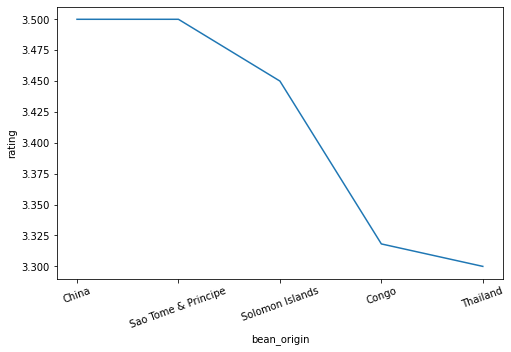

In [12]:
plt.figure(figsize=(8,5))
sns.lineplot(x='bean_origin', y='rating', data=top5_bean_origin, markers=True)
plt.xticks(rotation=20)
plt.show()

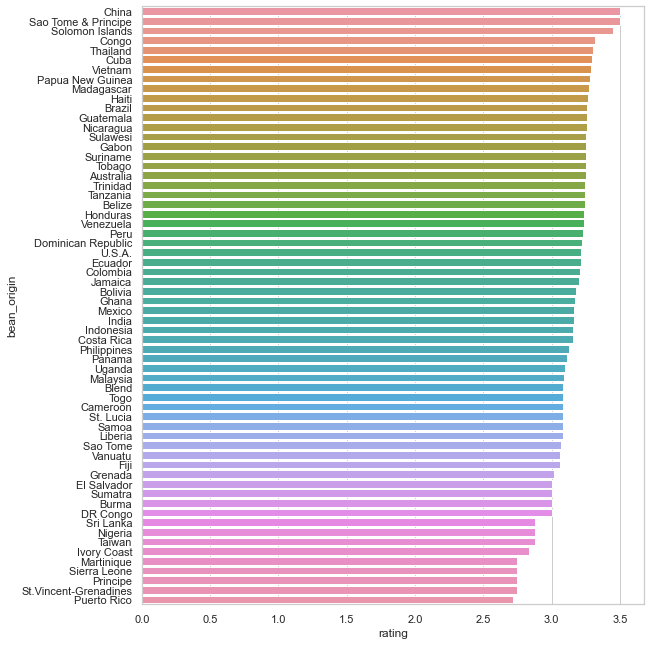

In [13]:
ax = plt.figure(figsize=(9,11))
sns.set_theme(style="whitegrid")
sns.barplot(x="rating", y="bean_origin", data=country_avg_rating)
plt.show()

### From the above cell, there are 62 different countries in the datasets where cocoa beans originate from.
### Chocolates made of cocoa bean from China, Sao Tome & Principe, Solomon Island, Congo and Thailand are the top five(5) highly rated chocolate bars.

In [14]:
manufacturer_avg_rating = df.groupby('manufacturer')[['rating']].mean().sort_values('rating', ascending=False).reset_index()

top5_bar_makers = manufacturer_avg_rating.head()
top5_bar_makers

,manufacturer,rating
0,Ocelot,3.875000
1,Heirloom Cacao Preservation (Zokoko),3.875000
2,Matale,3.812500
3,Patric,3.791667
4,Idilio (Felchlin),3.775000


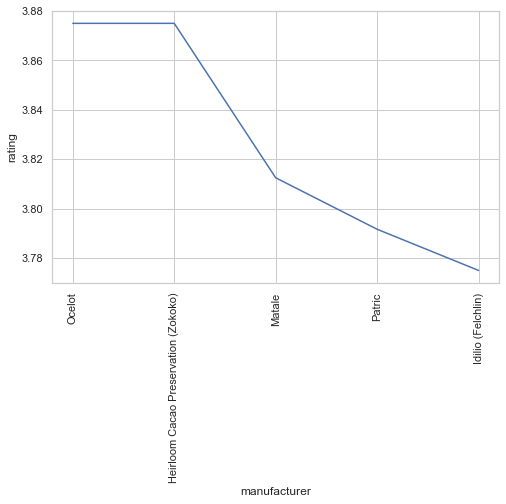

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(x='manufacturer', y='rating', data=top5_bar_makers, markers=True)
plt.xticks(rotation=90)
plt.show()

### Ocelot, Heirloom Cacao Preservation (Zokoko), Matale, Patric, Idilio (Felchlin) are the topmost rated chocolate bar makers 

In [16]:
last5_country_rating = country_avg_rating.tail()
last5_country_rating

,bean_origin,rating
57,Martinique,2.750000
58,Sierra Leone,2.750000
59,Principe,2.750000
60,St.Vincent-Grenadines,2.750000
61,Puerto Rico,2.714286


### Averagely, Chocolates made of cocoa bean from Puerto Rico are the worst rated chocolates.

In [17]:
# Now, for each of these countries let's find the total number of chocolates reviewed.
review_count = df.groupby('bean_origin')[['review']].count().reset_index()
review_count

,bean_origin,review
0,Australia,3
1,Belize,74
2,Blend,144
3,Bolivia,79
4,Brazil,77
...,...,...
57,U.S.A.,31
58,Uganda,18
59,Vanuatu,12
60,Venezuela,246


In [18]:
review_count_top5 = review_count[['bean_origin','review']].sort_values('review', ascending=False).head()
review_count_top5

,bean_origin,review
60,Venezuela,246
36,Peru,231
13,Dominican Republic,220
14,Ecuador,201
28,Madagascar,171


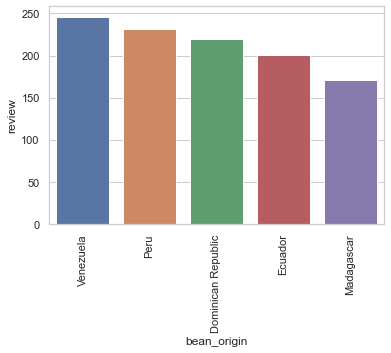

In [19]:
sns.barplot(x='bean_origin', y='review', data=review_count_top5)
plt.xticks(rotation=90)
plt.show()

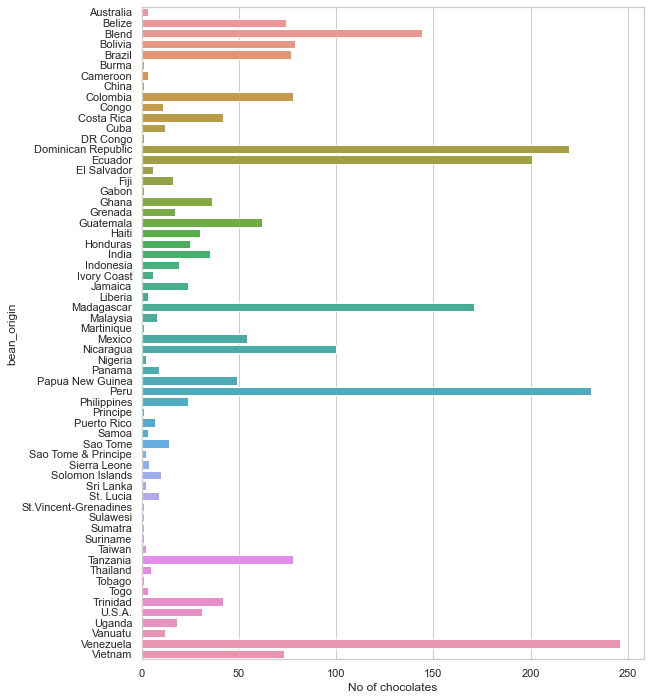

In [20]:
plt.figure(figsize=(9,12))
sns.barplot(x="review", y="bean_origin", data=review_count, units='review')
plt.xlabel('No of chocolates')
plt.show()

In [21]:
# compare cocoa content and rating using heatmap.
# first get the cocoa_percentage and rating from the dataset and get the correlation between them.
cocoa_and_rating = df[['cocoa_percent','rating']]
cocoa_and_rating.corr()

,cocoa_percent,rating
cocoa_percent,1.000000,-0.077173
rating,-0.077173,1.000000


<AxesSubplot:>

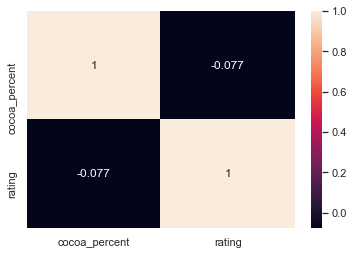

In [22]:
sns.heatmap(cocoa_and_rating.corr(), annot=True)

### There exist a weak negative correlation between cocoa content and rating such that, an increase in cocoa percentage will lead to a slight decrease in the rating of a chocolate bar. 

### To investigate further, let's try to check for outliers in the two columns(i.e. cocoa_percent and rating)

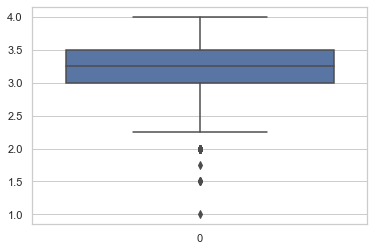

In [23]:
rating_outliers = sns.boxplot(data=cocoa_and_rating['rating'])

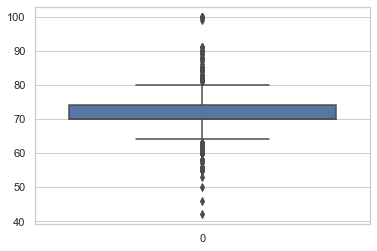

In [24]:
cocoa_percent_outliers = sns.boxplot(data=cocoa_and_rating['cocoa_percent'])

## There seems to be outliers in the cocoa_percent column and rating column .

In [25]:
# Check for the average cocoa content in chocolate bars whose rating are  above 3.5.
higher_rating_bars = df.loc[df['rating']>3.5]
higher_rating_bars

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
17,1011,A. Morin,France,2013,Ecuador,Equateur,70.0,4.0,"B,S,C,L","sandy, nutty, cocoa, fig",3.75
18,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.0,"B,S,C,L","oily, nut, caramel, raspberry",4.00
19,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,3.0,"B,S,C","sweet, cocoa, tangerine",4.00
...,...,...,...,...,...,...,...,...,...,...,...
2508,2048,Zoto (Chocolatoa),Belgium,2018,Nicaragua,"El Castillero, batch ca1705, 3 turns",70.0,3.0,"B,S,C","large grits, sweet, dried fruit",3.75
2513,647,Zotter,Austria,2011,Peru,Peru,70.0,4.0,"B,S*,C,Sa","creamy, fatty, mild nutty",3.75
2523,875,Zotter,Austria,2012,Dominican Republic,"Loma Los Pinos, Yacao region, D.R.",62.0,4.0,"B,S*,C,Sa","spice, caramel, toffee, salty",3.75
2524,879,Zotter,Austria,2012,Dominican Republic,Santo Domingo,70.0,4.0,"B,S*,C,Sa","strawberry, Cadbury egg",3.75


### There are 406 chocolate bars with rating above 3.5

In [26]:
higher_rating_bars.nlargest(5, columns=['rating','cocoa_percent'])

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
2165,1077,Soma,Canada,2013,Blend,"Crazy 88, Guat., D.R., Peru, Mad., PNG",88.0,3.0,"B,S,C","pronounced berry,mild smoke",4.0
2051,959,Scharffen Berger,U.S.A.,2012,Peru,San Juan de Cheni,78.0,4.0,"B,S,C,L","banana, pear, spice, cheese",4.0
298,48,Bonnat,France,2006,Venezuela,"Maracaibo, El Rosario",75.0,3.0,"B,S,C","creamy, fatty, floral",4.0
299,81,Bonnat,France,2006,Venezuela,Chuao,75.0,3.0,"B,S,C","creamy, coconut, tang",4.0
301,199,Bonnat,France,2008,Venezuela,"Porcelana, Venezuela",75.0,3.0,"B,S,C","creamy, strawberry, nutty",4.0


In [27]:
id_rating = higher_rating_bars.groupby('rating')[['id']].count().reset_index()
id_rating

,rating,id
0,3.75,295
1,4.00,111


### Also, chocolate bars with rating above 3.5 are either rated 3.75 or 4.00

In [28]:
# Average cocoa content for chocolate bars with rating above 3.5
avg_cocoa_content = higher_rating_bars['cocoa_percent'].mean()
avg_cocoa_content

70.99630541871922

## The average cocoa content in chocolate bars with rating above 3.5 is 70.996% (71%, approximately)

In [29]:
least_rated_bars = df.loc[df['rating']<3.5]
least_rated_bars

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75
...,...,...,...,...,...,...,...,...,...,...,...
2517,879,Zotter,Austria,2012,Bolivia,El Ceibo Coop,90.0,4.0,"B,S*,C,Sa","smooth, intense blueberry",3.25
2518,883,Zotter,Austria,2012,Congo,"Kongo, Highlands",68.0,4.0,"B,S*,C,Sa","creamy, caramel, salt, sweet",3.25
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00


In [30]:
# Average cocoa content for chocolate bars with rating above 3.5
avg_cocoa_content_l = least_rated_bars['cocoa_percent'].mean()
avg_cocoa_content_l

71.73299663299663

In [31]:
df.ingredients.nunique()

21

In [32]:
# Get the chocolate bars with lecithin from the dataset
lecithin_bars = df.loc[df['ingredients'].str.contains('L', regex=True)]
lecithin_bars

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75
10,1015,A. Morin,France,2013,Colombia,Colombie,70.0,4.0,"B,S,C,L","burnt rubber,alkalyzed notes",2.75
11,1011,A. Morin,France,2013,Madagascar,"Madagascar, Criollo",70.0,4.0,"B,S,C,L","sticky, red fruit, sour",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2500,697,Zokoko,Australia,2011,Bolivia,Alto Beni,68.0,4.0,"B,S,C,L","oily, honey, light rum",3.50
2501,701,Zokoko,Australia,2011,Papua New Guinea,Tokiala,66.0,4.0,"B,S,C,L","toffee, caramel, butterscotch",3.50
2502,701,Zokoko,Australia,2011,Bolivia,"Tranquilidad, Baures",72.0,4.0,"B,S,C,L",intense prune and berry,3.75
2503,1780,Zokoko,Australia,2016,Blend,Goddess Blend,65.0,5.0,"B,S,C,V,L","oily, sweet, choco, nutty",3.25


In [33]:
# Average rating of chocolate bars with Lecithin ingredient in thier content.
lecithin_bars['rating'].mean()

3.150608519269777

In [34]:
no_lecithin_bars = df.loc[df['ingredients'].str.contains('L')==False]
no_lecithin_bars

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [35]:
no_lecithin_bars['ingredients'].str.contains('L').sum()

0

In [36]:
# Average rating of bars without lecithin ingredient
no_lecithin_bars.rating.mean()


3.2251282051282053

### Bars without the Lecithin ingredient is rated higher than those with the Lecithin ingredients in their content. Because the average rating of bars without Lecithin is 3.225 as compared to 3.15 of chocolate bars with Lecithin.

In [37]:
# Let's do a little time series analysis of chocolate production
yearly_reviews = df.groupby('year_reviewed')[['id']].count().reset_index()
yearly_reviews

,year_reviewed,id
0,2006,60
1,2007,69
2,2008,84
3,2009,113
4,2010,94
5,2011,153
6,2012,180
7,2013,177
8,2014,243
9,2015,280


Text(0.5, 0, 'year')

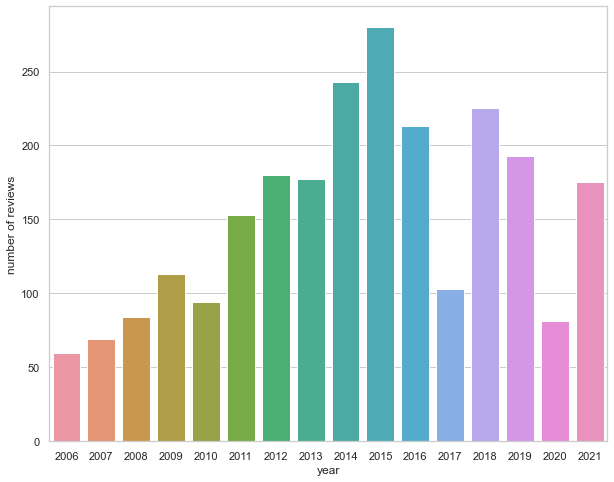

In [38]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, x='year_reviewed')
ax.set_ylabel('number of reviews')
ax.set_xlabel('year')

# Summary

- There exists a weak negative correlation between cocoa content and rating. i.e., there is no meaningful linear
    relationship between cocoa content and rating. Meaning, consumers do not rate a chocolate bar based on the cocoa 
    content in it.
- The average cocoa content in bars with higher rating (rating > 3.5) is 70.996%, which is closer to 71.7% of
    chocolate bars with rating less than 3.5
- The rating of chocolate bars differ by cocoa bean's origin. Therefore, cocoa bean's origin is an indicator of
  quality
- The average rating of chocolate bars without lecithin ingredient is 3.22 and that of bars with lecithin
    ingredients is 3.15 . This implies that, bar without lecithin is much appreciated or loved by consumers as
    compared to bars with the lecithin ingredients.
- Finally, in finding the best chocolate bars, the following should be checked;
    1. the cocoa bean should have originated from one(1) of the following countries China, Sao Tome & Principe,
        Solomon Island, Congo and Thailand. Reason being that, chocolate bars from these countries are mostly rated
        higher.
    2. the makers/producers of a particular chocolate bar should be one of Ocelot, Heirloom Cacao Preservation 
        (Zokoko), Matale,Patric, Idilio (Felchlin).